In [41]:
import pandas as pd
import pandas as pd
import re
import openpyxl
import datetime as dt
import sqlite3
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import decimal

import os
import sys
# SRC_DIR = r'/home/pp/program/jupyter/'
sys.path.append(os.path.dirname(r'/home/pp/program/jupyter/'))
from config import *
from dbfread import DBF
# for record in DBF(r'/home/pp/program/jupyter/SHMU/dbobce.dbf', encoding='cp1252', char_decode_errors='strict'):
#      print(str(record))


dbf = DBF(r'/home/pp/program/jupyter/SHMU/obce.dbf', encoding = 'UTF-8', char_decode_errors='strict') #, encoding=None, char_decode_errors='strict')
frame = pd.DataFrame(iter(dbf))
frame
frame.info()
frame.head(30)
print(frame.columns.tolist())
print(SHMUDIR)

# Replace 'your_file.parquet' with the path to your Parquet file
# df = pd.read_parquet(TEPLOTY_SK_DIR + 'teploty_sk.parquet')
# df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2927 non-null   int64  
 1   gml_id      2927 non-null   object 
 2   fid         2927 non-null   int64  
 3   osm_id      2927 non-null   object 
 4   osm_code    2902 non-null   float64
 5   osm_popula  2902 non-null   float64
 6   zbgis_idn4  2927 non-null   float64
 7   zbgis_nm4   2927 non-null   object 
 8   zbgis_idn3  2927 non-null   float64
 9   zbgis_nm3   2927 non-null   object 
 10  lat         2927 non-null   float64
 11  lon         2927 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 274.5+ KB
['id', 'gml_id', 'fid', 'osm_id', 'osm_code', 'osm_popula', 'zbgis_idn4', 'zbgis_nm4', 'zbgis_idn3', 'zbgis_nm3', 'lat', 'lon']
/home/pp/program/jupyter/SHMU/


In [36]:
d = { 'a' : 5, 'b' : 7, 'c' : 10}
grp = [['ab', 1], ['cd', 2], ['ef', 3]]
grpli = grp
di = d.items()
print(d, di)
for x, y in grp:
    print(x, y)
for (x,y), l in grp:
    print(x, y, l)
for x in grpli:
    print(x)
    

{'a': 5, 'b': 7, 'c': 10} dict_items([('a', 5), ('b', 7), ('c', 10)])
ab 1
cd 2
ef 3
a b 1
c d 2
e f 3
['ab', 1]
['cd', 2]
['ef', 3]


In [37]:
# Save the dataframe into multiple parquet files, split by month in Cas_CET column
# for (year, month), group in df.groupby([df['Cas_CET'].dt.year, df['Cas_CET'].dt.month]):
#     print(f"Processing year: {year}, month: {month}")
#     filename = f"{TEPLOTY_SK_DIR}teploty_sk_{year:04d}-{month:02d}.parquet"
#     group.to_parquet(filename)
#     print(f"Saved {filename} with {len(group)} records.")


In [39]:
import pandas as pd

# List of parquet files to read
files = [f"{RES_TEPLOTY_SK_DIR}teploty_sk_{year:04d}-{month:02d}.parquet" for year in [2025] for month in range(7,12)]
print(files)
# Read and filter each file, then concatenate
dfs = [pd.read_parquet(f).query("Stanica != 'rezno'") for f in files]
filtered_df = pd.concat(dfs, ignore_index=True)
df = filtered_df
filtered_df.info()
filtered_df.head(20)

['/home/pp/program/jupyter/SHMU/data/teploty_sk/teploty_sk_2025-07.parquet', '/home/pp/program/jupyter/SHMU/data/teploty_sk/teploty_sk_2025-08.parquet', '/home/pp/program/jupyter/SHMU/data/teploty_sk/teploty_sk_2025-09.parquet', '/home/pp/program/jupyter/SHMU/data/teploty_sk/teploty_sk_2025-10.parquet', '/home/pp/program/jupyter/SHMU/data/teploty_sk/teploty_sk_2025-11.parquet']


FileNotFoundError: [Errno 2] No such file or directory: '/home/pp/program/jupyter/SHMU/data/teploty_sk/teploty_sk_2025-07.parquet'

In [ ]:

# print(df.head())
# print(df.describe())
# print(tf.info())
# print(df.filter(like=25, axis=0).head(20))
bdf = df[df['Stanica'] == 'Brezno']
# bdf = df[df.index == 8]
bdf.index.unique()

# print(bdf.info())

Index([    63,    155,    173,    365,    458,    492,    628,    766,    862,
          960,
       ...
       262859, 262957, 263055, 263153, 263252, 263351, 263434, 263521, 263639,
       263737],
      dtype='int64', length=2682)

In [ ]:
bdf.loc[:,['Teplota','Tlak']].agg(['min', 'max', 'mean', 'std', 'count'])


,Teplota,Tlak
min,-6.900000,991.800000
max,34.200000,1031.400000
mean,11.806749,1018.094552
std,7.756855,6.197844
count,2682.000000,2680.000000


<Axes: title={'center': 'Brezno - Teplota a Tlak (1961-2023)'}, xlabel='Teplota', ylabel='Tlak'>

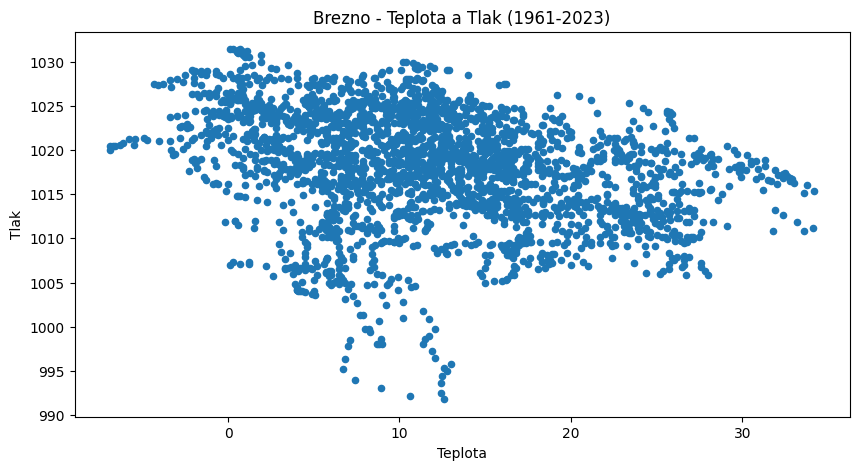

In [ ]:
bdf.loc[:,['Teplota','Tlak']].plot(kind='scatter', x='Teplota', y='Tlak', figsize=(10,5), title='Brezno - Teplota a Tlak (1961-2023)')

In [ ]:
result = bdf.set_index(bdf.Cas_CET).resample('D').agg({'Teplota':['min', 'max', 'mean'], 'Tlak':['mean']})  
# bdf.groupby(bdf.index).agg({'Teplota':['min', 'max', 'mean', 'std', 'count'], 'Tlak':['min', 'max', 'mean', 'std', 'count']}).plot(kind='line', y=('Teplota','mean'), figsize=(10,5), title='Brezno - Teplota (1961-2023)')    
result.to_excel(TEPLOTY_SK_DIR + 'teploty_brezno_den.xlsx')
# result.in
